# Basic Regression

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

### Data


In [16]:
df = pd.read_csv('Population_Traffic_2017_NW.csv')

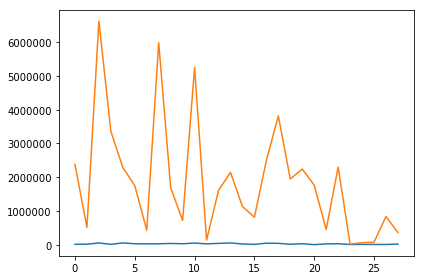

In [19]:
# Visualize the dataset
df.plot(legend=False)
plt.tight_layout()
plt.show()


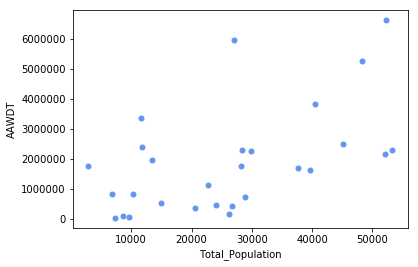

In [21]:
# Using the pandas plot.scatter
df.plot.scatter('Total_Population', 'AAWDT', s=100, marker='.', color="cornflowerblue")
plt.show()

### Preprocessing

In [20]:
# Find missing values
missing_values = df.isna().sum()
print(missing_values)


Total_Population    0
AAWDT               0
dtype: int64


In [ ]:
# Possibly use interpolation for missing values

# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = df.isna()

    # Interpolate the missing values
    df_interp = df.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    df_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    df_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

In [46]:
# X = df[['', '']]

X = df['Total_Population'].values.reshape(-1, 1)
y = df['AAWDT'].values.reshape(-1, 1)


In [47]:
# Create train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    shuffle=True)


In [48]:
# Create linear regression object
reg = linear_model.LinearRegression()

In [49]:
# Use model to fit to the training data
reg.fit(X_train, y_train)
print(X_train.shape)
print(reg.coef_)
print(reg.intercept_)


(22, 1)
[[66.92945749]]
[345062.77517704]


In [34]:
# Predict on the test set
y_predict = reg.predict(X_test)


In [56]:
# Use model to fit to the training data, the X values are times and the Y values are positions of the Cheetah
reg.fit(X_train, y_train)
beta1 = reg.coef_[0][0]
beta0 = reg.intercept_[0]

# Print the slope m and intercept b
print('Scikit learn - Slope: ', beta1 , 'Intercept: ', beta0 )

Scikit learn - Slope:  49.21368890930398 Intercept:  804120.3976297986


In [35]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_predict))


Mean squared error: 1712903333976.46


In [36]:
print('Coefficient of determination: %.2f' % r2_score(y_test, y_predict))


Coefficient of determination: -1.67


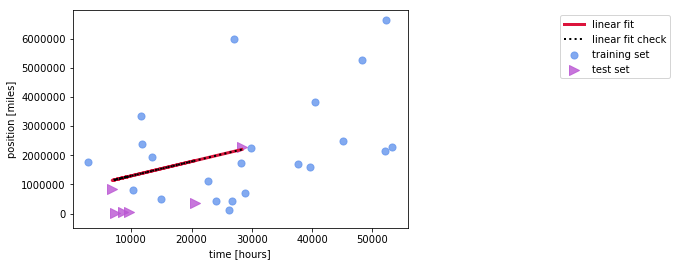

In [59]:
# From the equation
Y_calc_test_2 = beta1*X_test + beta0

# Another way to get this is using the regr.predict function
Y_calc_test = reg.predict(X_test)

# Lets plot exact positions respect to the time values using a scatter plot
plt.scatter(X_train, y_train, s=50, marker='o', color="cornflowerblue", alpha=0.8, label="training set")
plt.scatter(X_test, y_test, s=100, marker='>', color="mediumorchid", alpha=0.8, label="test set")
plt.xlabel('time [hours]')
plt.ylabel('position [miles]')

# Now we compare to our fit by plotting both Y_cal and Y_calc_2 respect to time 
plt.plot(X_test, Y_calc_test, color='crimson',linewidth=3, label='linear fit')
plt.plot(X_test, Y_calc_test_2,':', color='black',linewidth=2, label='linear fit check')
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
plt.show()

### Plotting predicted versus datapoints

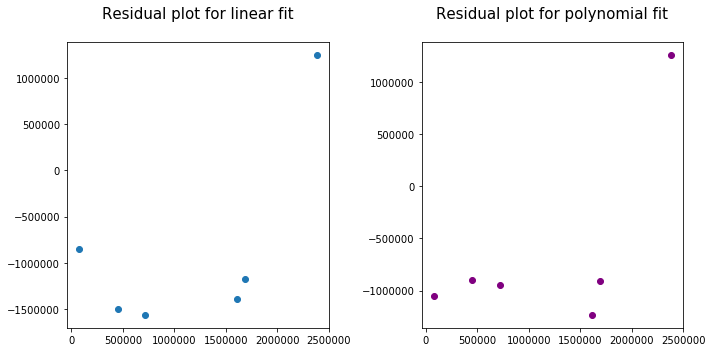

In [41]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(y_test, y_test-y_predict, marker='o')
ax[0].set_title('Residual plot for linear fit\n', fontsize=15)

degree = 5
model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
model.fit(X, y)
y_poly = model.predict(X_test)

ax[1].scatter(y_test, y_test-y_poly, c="purple")
ax[1].set_title('Residual plot for polynomial fit\n', fontsize=15)

plt.tight_layout()


## Ridge Regression

In [52]:
# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.8, 
                                                    shuffle=False, 
                                                    random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)


-0.6205630041371681


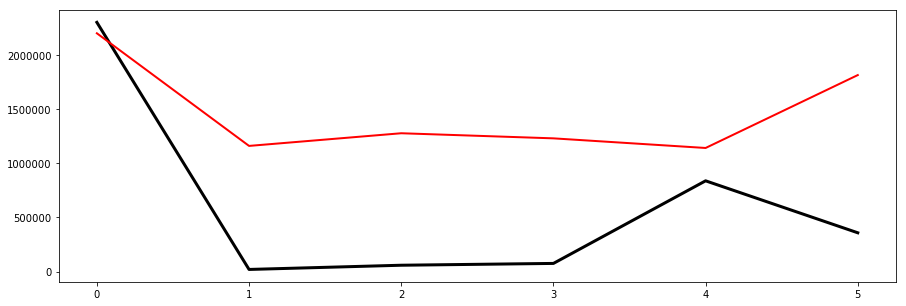

In [53]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()
